# **`Model Inference`**

`Import Library`

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import joblib
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

`Load Model`

In [2]:
mnv2 = load_model('mnv2_glassesornoglasses.h5')

`Data Inference`

In [34]:
# Load and preprocess the image
img_path = 'marcel2.jpg'
img = image.load_img(img_path, target_size=(160, 160))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

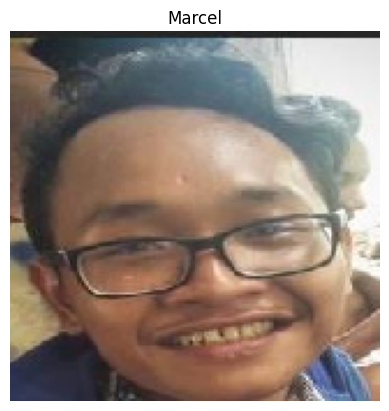

In [35]:
# Load and show the input image
img = image.load_img(img_path, target_size=(160, 160))
plt.imshow(img)
plt.axis('off')
plt.title('Marcel')
plt.show()

`Predict`

In [36]:
# Make predictions
# preds = mnv2.predict(img_array)
preds = mnv2.predict_on_batch(img_array).flatten()
preds = tf.nn.sigmoid(preds)
preds = tf.where(preds < 0.5, 'glasses', 'no_glasses')
print('Predictions:\n', preds.numpy())

Predictions:
 [b'no_glasses']


The prediction is correct for indonesian faces even has european faces on the training

`Inferences with a lot of pict`

In [41]:
import os
BATCH_SIZE = 32
IMG_SIZE = (160, 160)
INF_DIR = 'inf'

# Get a list of all image files in the "inf" folder
img_files = [os.path.join(INF_DIR, f) for f in os.listdir(INF_DIR) if f.endswith('.jpg')]

# Load and preprocess each image, then make predictions
for img_path in img_files:
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    prediction = mnv2.predict(img_array)[0]
    class_idx = int(tf.round(prediction).numpy())
    class_name = class_names[class_idx]
    print(f'Predicted class for {img_path}: {class_name}')

1/1 [==============================] - 0s 46ms/step
Predicted class for inf\allysa.jpg: no_glasses
1/1 [==============================] - 0s 49ms/step
Predicted class for inf\marcel.jpg: glasses
1/1 [==============================] - 0s 50ms/step
Predicted class for inf\marcel2.jpg: glasses


the prediction is 100% correct